
## CPI Model Training

Having explored the data and determined it's statistical significances, we will now move on to modeling our data. The methods we will use is to begin with a baseline regression then depending on our results we will attempt other algorithms for predictive analysis.

Further modeling will involve larger amount of data and higher level of training, prediction, and accuracy measures. 

In [96]:
# Same data as cpi in CPI in EDA
import pandas as pd

cpi = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data/cpi_analysis_22.csv')
print('\n', "Series ID: CUUR0000SA0", '\n', "Consumer Price Index")
print(cpi.shape)
cpi.head()


 Series ID: CUUR0000SA0 
 Consumer Price Index
(145, 5)


,Series ID,Year,Period,Label,Value
0,CUUR0000SA0,2010,M01,2010 Jan,216.687
1,CUUR0000SA0,2010,M02,2010 Feb,216.741
2,CUUR0000SA0,2010,M03,2010 Mar,217.631
3,CUUR0000SA0,2010,M04,2010 Apr,218.009
4,CUUR0000SA0,2010,M05,2010 May,218.178


In [92]:
# Filter to see only 10 years of data Jan (2012-2022) 
cpi = cpi[cpi['Year'] > 2011]

,Series ID,Year,Period,Label,Value
24,CUUR0000SA0,2012,M01,2012 Jan,226.665
25,CUUR0000SA0,2012,M02,2012 Feb,227.663
26,CUUR0000SA0,2012,M03,2012 Mar,229.392
27,CUUR0000SA0,2012,M04,2012 Apr,230.085
28,CUUR0000SA0,2012,M05,2012 May,229.815
...,...,...,...,...,...
140,CUUR0000SA0,2021,M09,2021 Sep,274.310
141,CUUR0000SA0,2021,M10,2021 Oct,276.589
142,CUUR0000SA0,2021,M11,2021 Nov,277.948
143,CUUR0000SA0,2021,M12,2021 Dec,278.802


In [ ]:
# Creata dict to split Label into month and year ex. 2012 Jan -> 12.1

In [87]:
# Perform a simple train and test split of the data
#cpi['Year'] = cpi[cpi['Year'] > 2011]
train = cpi[cpi['Year'] < 2020 ]
test = cpi[cpi['Year'] > 2020]

train.shape, test.shape

((120, 5), (13, 5))

In [82]:
# Baseline (Mean)
train['Value'].mean()

237.11898333333338

In [83]:
# Arrange y target vectors
target = 'Value'
y_train = train[target]
y_test = test[target]

In [84]:
# Get mean baseline
print('Mean Baseline (using 0 features)')
guess = y_train.mean()

Mean Baseline (using 0 features)


In [90]:
# Train Error
from sklearn.metrics import mean_absolute_error
y_pred = [guess] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error (2012-2021 CPI): {mae:.2f} percentage points')

Train Error (2012-2021 CPI): 8.88 percentage points


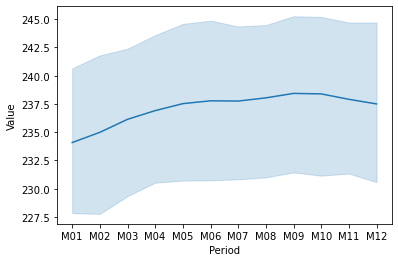

In [89]:
# Over a 12-month period
import seaborn as sns

sns.lineplot(train['Period'], train['Value']);

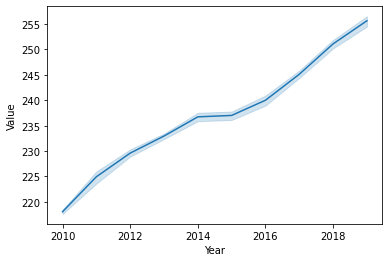

In [91]:
sns.lineplot(train['Year'], train['Value']);

In [5]:
cpi.shape

(145, 5)

In [6]:
cpi.describe()

,Value
count,145.000000
mean,242.019290
std,15.109996
min,216.687000
25%,231.407000
50%,238.343000
75%,252.776000
max,281.148000


In [43]:
# Get a visual of the distribution of values
import plotly.graph_objects as go
display(go.Figure(data=go.Histogram(x=cpi['Value']))) # Right skewed

In [95]:
# Get a visualization of pairplot - Must add more data


In [11]:
"""
What model can we use to predict the CPI? The only thing we need to do is 
a linear regression or random forest. However, we have an extremely small
dataset.
"""
# How do we split the data into training and testing sets?
# We can use the sklearn library to split the data into training and testing. 
# Our 

'\nWhat model can we use to predict the CPI? The only thing we need to do is \na linear regression or random forest. However, we have an extremely small\ndataset.\n'

In [12]:
# Create a function to iterate through the months and years
# for each observation

def iterate_months(df):
    for i in range(0, len(df)):
        yield df.iloc[i]['Month'], df.iloc[i]['Year']

In [16]:
# Filter the values to .2f for example: 143.3452 ~> 143.35
def filter_values(value):
    return round(value, 2)

In [17]:
# We need to preprocess the data to get the values in the correct format
# for the plotly graph
def preprocess_data(df):
    df['Period'] = df['Period'].apply(lambda x: x.split('-')[1])
    df['Period'] = df['Period'].apply(lambda x: int(x))
    df['Year'] = df['Year'].apply(lambda x: int(x))
    df['Value'] = df['Value'].apply(lambda x: filter_values(x))
    return df

In [25]:
# Standardize the data value column using sklearn
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(cpi['Value'].values.reshape(-1, 1))

StandardScaler()

In [19]:
# Scale the data
cpi['Value'] = scaler.transform(cpi['Value'].values.reshape(-1, 1))

In [31]:
# Now we can split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cpi['Value'], cpi['Year'], test_size=0.2, random_state=42)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [32]:
# We can now fit the model to the training data
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# We can now predict the values for the test data
y_pred = lr.predict(X_test)

In [40]:
# Check our predictions
y_pred[[0]]

array([[0.86803758]])

In [37]:
# Now we can plot the data
import plotly.graph_objects as go
import plotly.express as px

fig = px.scatter(
    cpi, x="Value", y="Year", color="Series ID",
    trendline="ols", trendline_color_override="#0072B2",
        size="Value", animation_frame="Year")
fig.show()

ValueError: 
    Invalid element(s) received for the 'size' property of scatter.marker
        Invalid elements include: [-1.6823364654263653, -1.678750284691438, -1.6196447133194587, -1.5945414481749518, -1.5833180306897119, -1.5974635213663764, -1.594408626666252, -1.5744189896067387, -1.5659848238042196, -1.5479210986208751]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

In [ ]:
# Test the accuracy of our model


In [44]:
y_pred()

TypeError: 'numpy.ndarray' object is not callable